Instruções de instalação

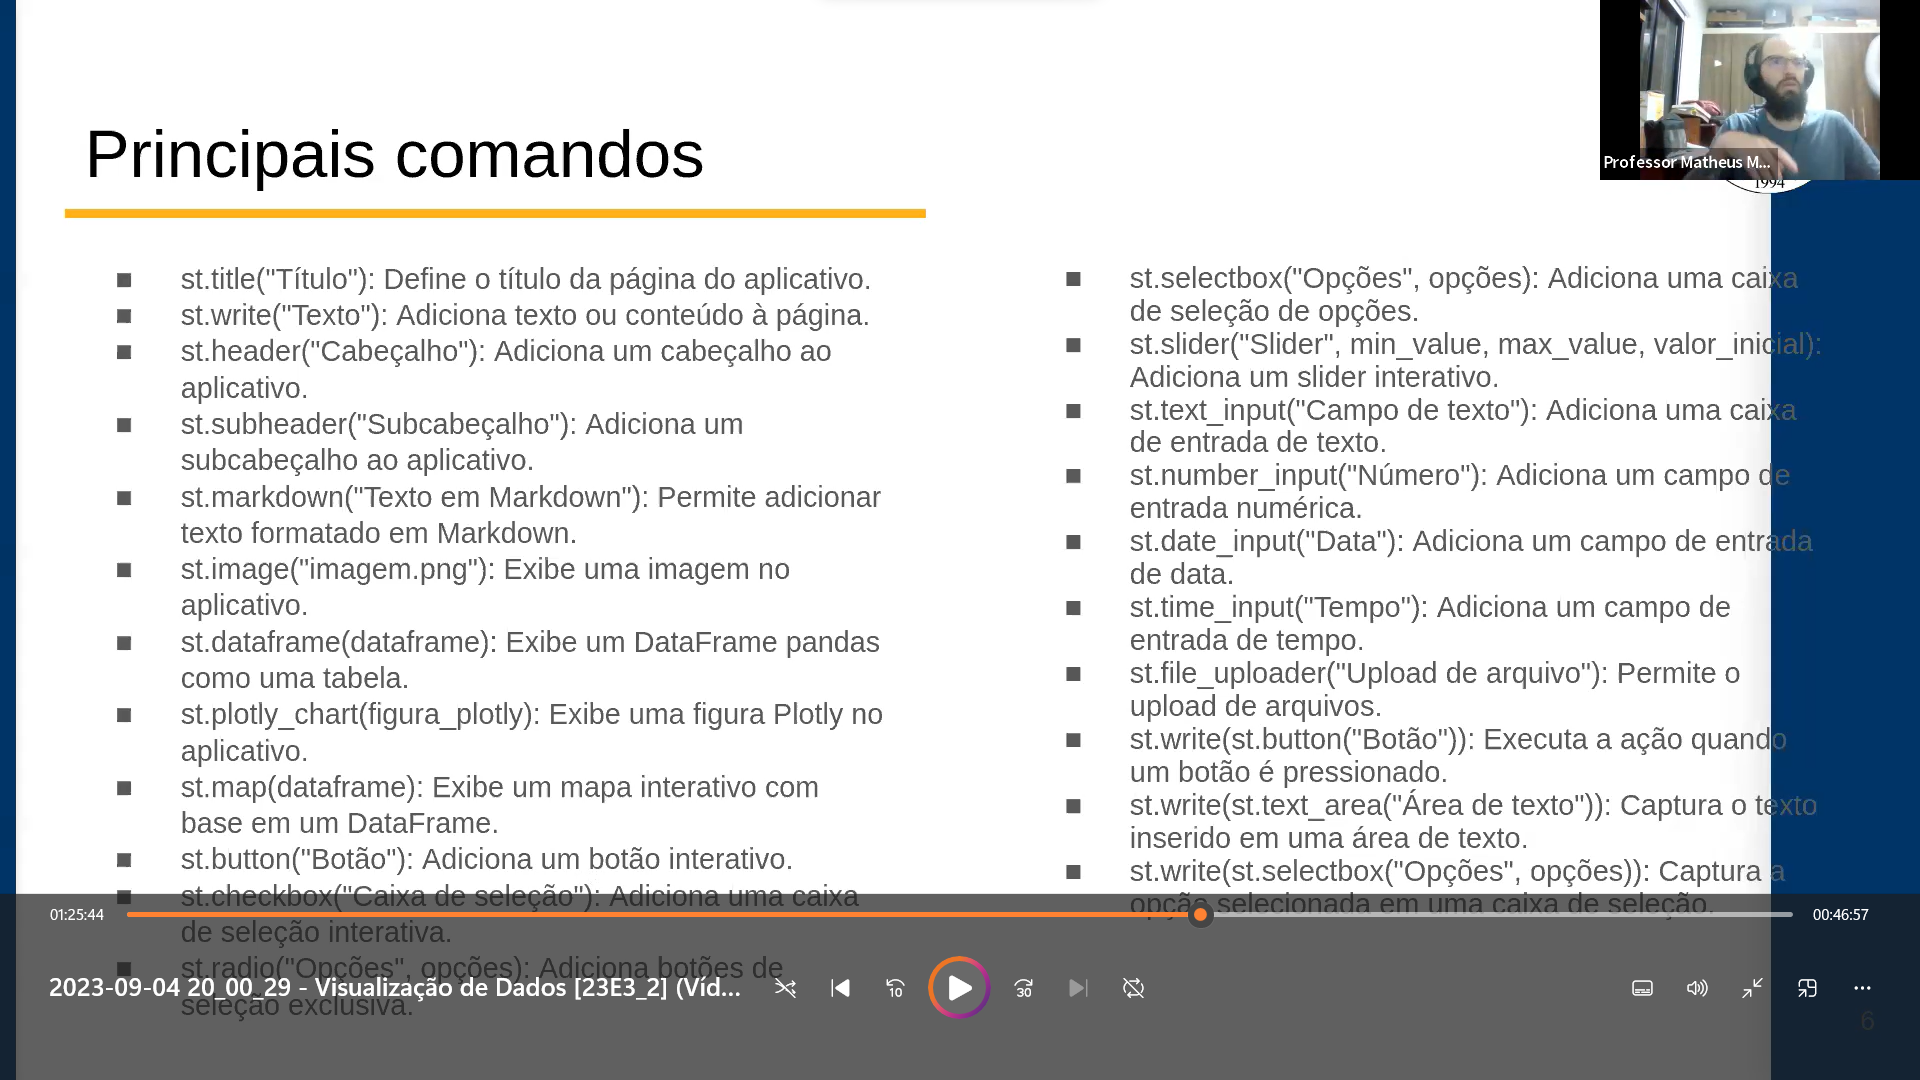

In [ ]:
#Instalar o Streamlit
!pip install streamlit

Criar um arquivo executável com o conteúdo desejado a ser mostrado no streamlit

In [28]:
%%writefile teste.py

#Criar o arquivo do streamlit com o conteúdo desejado
import streamlit as st
st.title("Olá Mundo")

Overwriting teste.py


Executar o arquivo .py criado, gerando uma url para ver o conteúdo no browser

In [2]:
#Precisa executar via terminal
#Precisa usar o comando cd notebooks, para nagevar até a pasta antes de executar
streamlit run teste.py --server.port=8086 --browser.serverAddress='177.192.12.238'
#Ao executar o código vai abrir automaticamente o navegador com um endereço incorreto, basta trocar para http://localhost:8080/
#Após executar pela primeira vez não precisa executar esse código novamente a cada vez que modifica o arquivo, basta dar F5 no browser
#Para parar de executar tem de voltar no terminal e apertar Ctrl+C

SyntaxError: invalid syntax (3724339080.py, line 3)

Formatar usando Markdown

In [14]:
st.write("""
# texto h1
aqui tem um texto normal

## texto h2
**aqui tem um texto em negrito**

- lista 1
- lista 2
  - sublista 2.1
  - sublista 2.2
""")

Overwriting teste.py


Formatar usando comandos

In [ ]:
%%writefile teste.py
#Criar o arquivo do streamlit com o conteúdo desejado
#Para que as formatações funcionem tem de estar exatamente igual abaixo, com espaço após as # ou - e com dois espaços antes do subitem
import streamlit as st
st.title("Meu título")
st.header("Meu Cabeçalho")
st.subheader("Meu subcabeçalho")

Criando um botão clicável

In [13]:
%%writefile teste.py
import streamlit as st

st.title("Olá Mundo")
if st.button("Desligar Mundo"):
    st.write("Armagedon!")

Overwriting teste.py


Adicionando Gráficos

In [18]:
%%writefile teste.py
import streamlit as st
import matplotlib.pyplot as plt
import numpy as np

st.header("Gráfico de linhas")
y = np.linspace(0,10,100)
x = np.sin(y)

fig,ax = plt.subplots()
ax.plot(x,y)
st.pyplot(fig)

Overwriting teste.py


checkbox

In [3]:
%%writefile teste.py
import streamlit as st

if st.checkbox('exibir mensagem'):
    st.write("Este é o TP3 de Visualização de Dados")

Overwriting teste.py


In [7]:
%%writefile teste.py
import streamlit as st

cor = ['azul', 'rosa', 'cinza','amarelo']

# Cria um menu suspenso para que o usuário escolha uma cor
selecao = st.selectbox('Selecione a cor:', cor)

# Define a cor selecionada com base na escolha do usuário
if selecao == 'azul':
    cor = 'blue'
elif selecao == 'rosa':
    cor = 'pink'
elif selecao == 'cinza':
    cor = 'gray'
elif selecao == 'amarelo':
    cor = 'yellow'

# Exibe um retângulo colorido usando a cor selecionada
st.write(f'<div style="background-color: {cor}; width: 200px; height: 200px;"></div>', unsafe_allow_html=True)

Overwriting teste.py


In [12]:
%%writefile teste.py
import streamlit as st

cor = ['azul','rosa','cinza','amarelo']

selecao = st.selectbox('Selecione a cor:', cor)

if selecao == 'azul':
    cor_selec = 'blue'
if selecao == 'rosa':
    cor_selec = 'pink'
if selecao == 'cinza':
    cor_selec = 'gray'
if selecao == 'amarelo':
    cor_selec = 'yellow'

st.write(f'<div style="background:{cor_selec}; width: 200px; height: 200px;"></div>', unsafe_allow_html=True)

Overwriting teste.py


Campo para input numérico

In [16]:
%%writefile teste.py
import streamlit as st

numero = st.number_input('Insira um número inteiro',step=1)


Overwriting teste.py


Criando um botão

In [18]:
%%writefile teste.py
import streamlit as st
valor_recebido = st.number_input('Forneça um número:')
resultado = 0

if st.button('Clique para calcular o dobro'):
    resultado = valor_recebido * 2
st.write(f'O dobro é {resultado}')

Overwriting teste.py


Botão para upload de arquivo

In [20]:
%%writefile teste.py

import streamlit as st
import pandas as pd

# Cria um botão para que o usuário faça o upload do arquivo CSV
arquivo = st.file_uploader('Upload', type='csv')

# Se o usuário fez o upload do arquivo, exibe as primeiras 5 linhas dos dados

if arquivo is not None:
    df = pd.read_csv(arquivo)
    st.write(df.head(5))


Overwriting teste.py


Criando mais de uma página e link de navegação

In [24]:
%%writefile teste.py
import streamlit as st
import pandas as pd

def main():
    st.write('Primeira página')
    if st.button('Segunda página'):
        segunda_pagina()

def segunda_pagina():
    st.write('Segunda página')

main()

Overwriting teste.py


In [38]:
%%writefile ./paginas/pages/sec_pag.py
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

st.header('Segunda Página')
data = pd.DataFrame(np.random.randn(50,2), columns=['x','y'])

fig,ax = plt.subplots()
ax.scatter(data['x'],data['y'])
ax.set_xlabel('Eixo X')
ax.set_label('Eixo Y')
st.pyplot(fig)

Overwriting ./paginas/pages/sec_pag.py


Criar colunas

In [ ]:
%%writefile stream.py
import streamlit as st

esquerda, direita = st.columns(2)

with esquerda:
    st.image('imgleft.jpg')
with direita:
    st.image('imgright.jpg')

Criar slicers de filtro

In [ ]:
%%writefile stream.py
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(1)
df = pd.DataFrame(np.random.randn(50,2), columns=['x','y'])

filtro = st.slider('filtrar range de Y', df['y'].min(),df['y'].max(),(df['y'].min(),df['y'].max()))

df_filtrado = df[(df['y'] >= filtro[0]) & (df['y'] <= filtro[1])]

fig,ax = plt.subplots()
ax.scatter(df_filtrado['x'],df_filtrado['y'])
ax.set_xlabel('Eixo X')
ax.set_label('Eixo Y')
st.pyplot(fig)